In [ ]:
"""
  Author: Mann Desai
  Topic: Fetch results (Description) according to product name
  POC_Work
"""

'\n  Author: Mann Desai\n  Topic: Fetch results (Description) according to product name\n  POC_Work\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/product_desription/marketing_sample_for_amazon_com-ecommerce__20200101_20200131__10k_data.csv')

In [ ]:
df.shape

(10002, 28)

In [ ]:
df.head()

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [ ]:
first_row = df[:19]
print(first_row)

                             Uniq Id  \
0   4c69b61db1fc16e7013b43fc926e502d   
1   66d49bbed043f5be260fa9f7fbff5957   
2   2c55cae269aebf53838484b0d7dd931a   
3   18018b6bc416dab347b1b7db79994afa   
4   e04b990e95bf73bbe6a3fa09785d7cd0   
5   f8c32a45e507a177992973cf0d46d20c   
6   40d3cd16b41970ae6872e914aecf2c8e   
7   bc178f33a04dbccefa95b165f8b56830   
8   cc2083338a16c3fe2f7895289d2e98fe   
9   69828c5570dcdbd1609216d33fbad0db   
10  7b0746d8afc8462ba17f8a763d9d5f1e   
11  c5f4c94653a3befd8dd16adf2914c04e   
12  615ba903c134f439eaf8cdd1678ceb5c   
13  82c86a4d24dce5e14303033d7b658b78   
14  1ecccb43e0f5c0162218371916ffa553   
15  d1ac6d805fcdf75f9e00af611dd03ce4   
16  d82015ffbf4cd54b0edfb890002971f3   
17  39f1b8a2129315da0288cd058b6b6086   
18  4af0833f20a8421788fc04577b0ef1c5   

                                         Product Name  Brand Name  Asin  \
0   DB Longboards CoreFlex Crossbow 41" Bamboo Fib...         NaN   NaN   
1   Electronic Snap Circuits Mini Kits Classpack,

In [ ]:
!pip install bs4

In [ ]:
from bs4 import BeautifulSoup
import requests
url = 'https://www.amazon.com/Great-Pretenders-Blooms-Deluxe-Medium/dp/B00CVB22UM'
custom_headers={
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
    'accept_language': 'en-IN,en;q=0.9,en-GB;q=0.8,en-US;q=0.7,hi;q=0.6,gu;q=0.5,te;q=0.4'
}

response = requests.get(url, headers=custom_headers)
soup = BeautifulSoup(response.text, 'lxml')



In [ ]:
title_element = soup.select_one('#productTitle')
print(title_element.text)

        Great Pretenders Fairy Blooms Deluxe Dress with Wings, Green, Medium       


In [ ]:
description_element = soup.select_one('#productDescription').text.strip()
print(description_element)

Running in the fields with fairy friends is where you will find your little one in this outfit. The satin ruched top allows your little fairy to be as free as her spirit. She will flutter around in the printed tulle skirt made from layers of colored tulle. This outfit would not be complete with matching detachable wings.


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [ ]:
null_columns = ['brand_name', 'asin', 'list_price', 'quantity', 'sku', 'stock', 'product_details', 'dimensions', 'color', 'ingredients', 'direction_to_use', 'size_quantity_variant', 'product_description']
data = df.drop(null_columns, axis=1)


In [ ]:
data.dropna(subset=['category'])
data['main_category'] = data['category'].str.split("|").str[0]
data['main_category']

0        Sports & Outdoors 
1             Toys & Games 
2             Toys & Games 
3             Toys & Games 
4             Toys & Games 
                ...        
9997          Toys & Games 
9998          Toys & Games 
9999       Office Products 
10000         Toys & Games 
10001       Home & Kitchen 
Name: main_category, Length: 10002, dtype: object

In [ ]:
data = data.dropna(subset='selling_price')
data['selling_price'] = data['selling_price'].str.strip('$')
pattern = r'^([0-9]{1, 3}(\, [0-9]{3})*|([0-9]+))(\.[0-9]{2})?$'
data = data[data['selling_price'].str.match(pattern)]
data.shape

<ipython-input-61-3b15b61b8fac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['selling_price'] = data['selling_price'].str.strip('$')


(9484, 16)

In [ ]:
data['main_category'].value_counts()


main_category
Toys & Games                                 6470
Home & Kitchen                                675
Clothing, Shoes & Jewelry                     512
Sports & Outdoors                             418
Baby Products                                 211
Arts, Crafts & Sewing                         120
Office Products                                75
Hobbies                                        34
Industrial & Scientific                        28
Health & Household                             23
Remote & App Controlled Vehicle Parts          22
Remote & App Controlled Vehicles & Parts       17
Tools & Home Improvement                       16
Pet Supplies                                   14
Grocery & Gourmet Food                         11
Patio, Lawn & Garden                           11
Beauty & Personal Care                         11
Automotive                                      9
Electronics                                     7
Video Games                         

In [ ]:
data.isna().sum()

uniq_id                     0
product_name                0
category                  792
upc_ean_code             9451
selling_price               0
model_number             1543
about_product             237
product_specification    1454
technical_details         709
shipping_weight          1050
product_dimensions       9046
image                       0
variants                 7150
product_url                 0
is_amazon_seller            0
main_category             792
dtype: int64

In [ ]:
data = data.drop('upc_ean_code', axis=1)

In [ ]:
data = data.drop('product_dimensions', axis=1)
data = data.drop('variants', axis=1)

In [ ]:
data = data.drop('category', axis=1)

In [ ]:
data.head()
print(data['product_url'])

0        https://www.amazon.com/DB-Longboards-CoreFlex-...
1        https://www.amazon.com/Electronic-Circuits-Cla...
2        https://www.amazon.com/3Doodler-Plastic-Innova...
3        https://www.amazon.com/Guillow-Airplane-Design...
4        https://www.amazon.com/Woodstock-Collage-500-p...
                               ...                        
9997     https://www.amazon.com/Remedia-Publications-RE...
9998     https://www.amazon.com/Trends-International-NF...
9999     https://www.amazon.com/NewPath-Learning-Scienc...
10000    https://www.amazon.com/Disney-Princess-Yoursel...
10001    https://www.amazon.com/Hasegawa-Ladders-Lucano...
Name: product_url, Length: 9484, dtype: object


In [ ]:
import requests
from bs4 import BeautifulSoup
def scrape_product_details(url):
    # Send a GET request to the product URL
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all table elements
        tables = soup.find_all('table')

        # Initialize a dictionary to store details
        details = {}

        # Check if table data is present
        if tables:
            # Iterate over each table
            for table in tables:
                table_id = table.get('id')
                if table_id:
                    for row in table.find_all('tr'):
                        key_element = row.find('th')
                        value_element = row.find('td')
                        if key_element and value_element:
                            key = key_element.text.strip()
                            value = value_element.text.strip()
                            details[key] = value
        else:
            # Find all list items
            list_items = soup.find_all('li')
            for item in list_items:
                text = item.get_text(strip=True)
                if ':' in text:
                    key, value = text.split(':', 1)
                    details[key.strip()] = value.strip()

        return details
    else:
        print(f"Failed to retrieve data from URL: {url}")
        return None


temp_urls = df['product_url']
product_urls = df['product_url'].tolist()
# print(len(product_urls))

product_details = scrape_product_details(url)

# Iterate over each product URL and scrape details
"""
for url in product_urls:
    product_details = scrape_product_details(url)
    if product_details:
        # Print the details for the current product
        print(f"Details for {url}:")
        for key, value in product_details.items():
            print(f"{key}: {value}")
        print()
"""

'\nfor url in product_urls:\n    product_details = scrape_product_details(url)\n    if product_details:\n        # Print the details for the current product\n        print(f"Details for {url}:")\n        for key, value in product_details.items():\n            print(f"{key}: {value}")\n        print()\n'

In [ ]:
# image_element = soup.select_one('#landingImage')
# image_url = image_element.attrs.get('src')
# print(image_url)

https://m.media-amazon.com/images/I/61jXjYEgx4L.__AC_SX300_SY300_QL70_ML2_.jpg


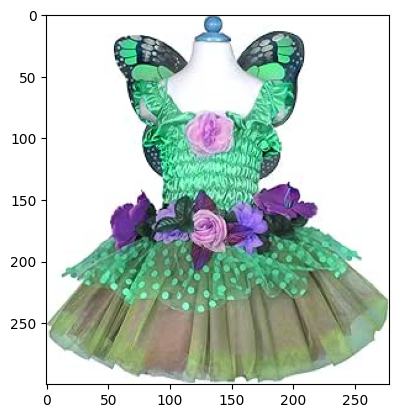

In [ ]:
"""
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# Assuming you already have the parsed HTML content and extracted image URL in 'image_url'

# Download the image data
response = urllib.request.urlopen(image_url)
image_array = np.array(bytearray(response.read()), dtype=np.uint8)

# Convert the array to a format suitable for displaying
img = cv2.imdecode(image_array, -1)

# Display the image
plt.imshow(img)
plt.show()
"""

In [ ]:
# price_element = soup.select_one('span.a-offscreen')
# # print(price_element.text)

$33.19


In [ ]:
data.head()

,uniq_id,product_name,selling_price,model_number,about_product,product_specification,technical_details,shipping_weight,image,product_url,is_amazon_seller,main_category
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,Sports & Outdoors
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...,Y,Toys & Games
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,Toys & Games
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,28.91,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y,Toys & Games
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,17.49,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...,Y,Toys & Games


In [ ]:
data.to_csv('data.csv', index=True)

In [ ]:
# print(type(product_details))
product_info = {}

In [ ]:
for url in product_urls:
    product_details = scrape_product_details(url)
    if product_details:
      # Print the details for the current product
      print(f"Details for {url}:")
      for attribute, value in product_details.items():
        if value is not None:
          product_info[attribute] = value
    if 'product_info' not in data.columns:
      data['product_info'] = None
    # Update the 'product_info' column of the current row with the product_info dictionary
    data.loc[data.index, 'product_info'] = product_info

Failed to retrieve data from URL: https://www.amazon.com/DB-Longboards-CoreFlex-Fiberglass-Longboard/dp/B07KMVJJK7
Failed to retrieve data from URL: https://www.amazon.com/Electronic-Circuits-Classpack-Motion-Detector/dp/B008AK6DAS
Failed to retrieve data from URL: https://www.amazon.com/3Doodler-Plastic-Innovate-Filament-Refills/dp/B07D36747F
Failed to retrieve data from URL: https://www.amazon.com/Guillow-Airplane-Design-Studio-Building/dp/B076Y2SNHM
Failed to retrieve data from URL: https://www.amazon.com/Woodstock-Collage-500-pc-Puzzle/dp/B07MX21WWX
Details for https://www.amazon.com/Terra-Battat-Dinosaurs-Collectable-Stegosaurus/dp/B07PF1R8LS:
Failed to retrieve data from URL: https://www.amazon.com/Rubies-Deluxe-Pikachu-Pokemon-Costume/dp/B07BZJM592
Failed to retrieve data from URL: https://www.amazon.com/Hoffmaster-120813-Double-Tipped-Triangular-Wrapped/dp/B00BS7XCZ4
Details for https://www.amazon.com/ARTSCAPE-Etched-Glass-Window-Film/dp/B000Q3PRYA:
Details for https://www.amaz

KeyboardInterrupt: 

In [ ]:
for index, row in data.iterrows():
    # Initialize an empty dictionary to store product info for the current row
    product_info = {}
    # Check if product_details is not None and is a dictionary
    if product_details and isinstance(product_details, dict):
        # Iterate over each attribute in the product details dictionary
        for attribute, value in product_details.items():
            # Check if the value is not None before adding it to product_info
            if value is not None:
                product_info[attribute] = value
    # Check if the 'product_info' column exists in the DataFrame
    if 'product_info' not in data.columns:
        # If not, create the 'product_info' column
        data['product_info'] = None
    # Update the 'product_info' column of the current row with the product_info dictionary
    data.loc[data.index, 'product_info'] = product_info


In [ ]:
data.isna().sum()

uniq_id                     0
product_name                0
selling_price               0
model_number             1543
about_product             237
product_specification    1454
technical_details         709
shipping_weight          1050
image                       0
product_url                 0
is_amazon_seller            0
main_category             792
product_info             9484
dtype: int64

In [ ]:
data.head()

,uniq_id,product_name,selling_price,model_number,about_product,product_specification,technical_details,shipping_weight,image,product_url,is_amazon_seller,main_category,product_info
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,Y,Sports & Outdoors,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Electronic-Circuits-Cla...,Y,Toys & Games,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/3Doodler-Plastic-Innova...,Y,Toys & Games,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,28.91,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Guillow-Airplane-Design...,Y,Toys & Games,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,17.49,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/Woodstock-Collage-500-p...,Y,Toys & Games,NaN


In [ ]:
print(product_info)

{'Product Dimensions': '21 x 21 x 10 inches', 'Item Weight': '11.7 ounces', 'ASIN': 'B00CVB22UM', 'Item model number': '36605', 'Manufacturer recommended age': '36 months - 8 years', 'Best Sellers Rank': '#115,549 in Patio, Lawn & Garden (See Top 100 in Patio, Lawn & Garden)  #1,621 in Outdoor Statues', 'Is Discontinued By Manufacturer': 'No', 'Department': 'girls', 'Manufacturer': 'Creative Education of Canada, Inc'}


In [ ]:
product_info_df = pd.DataFrame([product_info])

data = pd.concat([data, product_info_df], axis=1)


In [ ]:
data.shape

(9484, 21)

In [ ]:
data.isna().sum()

uniq_id                     0
product_name                0
selling_price               0
model_number             1543
about_product             237
product_specification    1454
technical_details         709
shipping_weight          1050
image                       0
product_url                 0
is_amazon_seller            0
main_category             792
product_info             9484
dtype: int64